In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/ilya-lysenko-An/Pet-A.B/main/AB_Test_Results.csv"
df = pd.read_csv(url)
print("Проверка дата фрейма", df.shape)
print("Метрики дата фрейма:")
print(df.head().T)

Проверка дата фрейма (10000, 3)
Метрики дата фрейма:
                    0        1        2        3        4
USER_ID           737     2423     9411     7311     6174
VARIANT_NAME  variant  control  control  control  variant
REVENUE           0.0      0.0      0.0      0.0      0.0


In [4]:
group_count = df['VARIANT_NAME'].value_counts()
print("Колличество пользователей в каждой группе")
print(group_count)
group_percent = df['VARIANT_NAME'].value_counts(normalize=True) * 100
print("\nПроцентное распределение")
print(group_percent)

Колличество пользователей в каждой группе
VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

Процентное распределение
VARIANT_NAME
variant    50.16
control    49.84
Name: proportion, dtype: float64


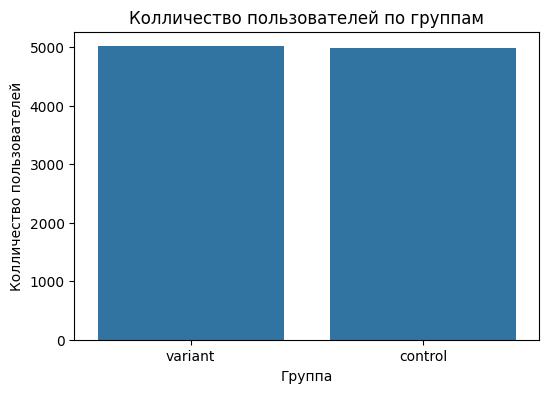

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'VARIANT_NAME')
plt.title("Колличество пользователей по группам")
plt.xlabel("Группа")
plt.ylabel("Колличество пользователей")
plt.show()

In [9]:
group_stats = df.groupby("VARIANT_NAME")['REVENUE'].describe()
print("Описательная статистика дохода по группам")
print(group_stats)

Описательная статистика дохода по группам
               count      mean       std  min  25%  50%  75%     max
VARIANT_NAME                                                        
control       4984.0  0.129013  3.007524  0.0  0.0  0.0  0.0  196.01
variant       5016.0  0.070070  1.314802  0.0  0.0  0.0  0.0   58.63


In [11]:
control = df[df['VARIANT_NAME'] == 'control']['REVENUE'].values
variant = df[df['VARIANT_NAME'] == 'variant']['REVENUE'].values

n_iterations = 1000
rng = np.random.default_rng(seed=42)
diff_means = []

for _ in range(n_iterations):
    sample_control = rng.choice(control, size = len(control), replace = True)
    sample_variant = rng.choice(variant, size = len(variant), replace = True)
    diff = sample_variant.mean() - sample_control.mean()
    diff_means.append(diff)

diff_means = np.array(diff_means)

ci_lower = np.percentile(diff_means, 2.5)
ci_upper = np.percentile(diff_means, 97.5)
uplift = (variant.mean() - control.mean()) / control.mean() * 100

print(f"Средний доход control: {control.mean():.4f}")
print(f"Средний доход variant: {variant.mean():.4f}")
print(f"Разница средних (variant - control): {variant.mean() - control.mean():.4f}")
print(f"95% доверительный интервал разницы: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Uplift (в процентах): {uplift:.2f}%")

Средний доход control: 0.1290
Средний доход variant: 0.0701
Разница средних (variant - control): -0.0589
95% доверительный интервал разницы: [-0.1661, 0.0161]
Uplift (в процентах): -45.69%


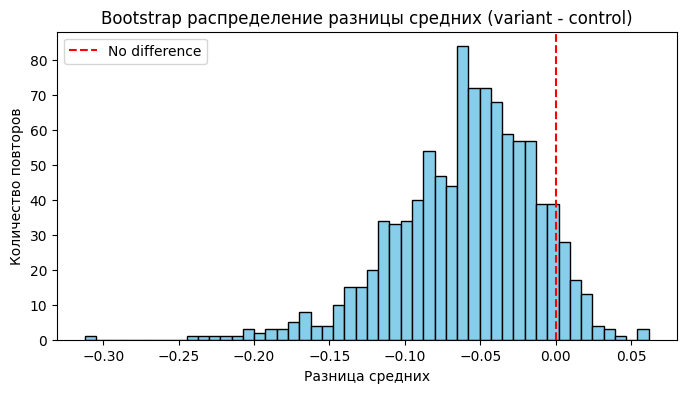

In [12]:
plt.figure(figsize=(8,4))
plt.hist(diff_means, bins=50, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='No difference')
plt.title("Bootstrap распределение разницы средних (variant - control)")
plt.xlabel("Разница средних")
plt.ylabel("Количество повторов")
plt.legend()
plt.show()